# Experimenting with Models from Harde and Salby (2021)


## Contents:

<ol>
   <li><a href='#preamble'>Preamble<a></li>
   <li><a href='#assembling_the_required_data'>Assembling the Required Data<a></li>
   <li><a href='#a_corollary_of_mass_balance'>A Corollary of Mass Balance<a></li>
   <li><a href='#ajustment_and_residence_time_not_the_same'>Adjustment Time and Residence Time are NOT the Same Thing<a></li>
   <li><a href="#trying_to_reproduce_figure_5">Trying to Reproduce Figure 5</a>
</ol>

<a id='preamble'></a>

## Preamble

First we import libraries for maths functions and for plotting data etc:

In [1]:
import math
import matplotlib.pyplot as plt
from scipy.optimize import least_squares 
import numpy as np;

<a id='assembling_the_required_data'></a>

## Assembling the Required Data

Prof Harde was kind enough to provide a spreadsheet containing the data used in the experiments.  As this is not downloadable from the world-wide webb, I shall hardcode it here, so that the notebook is self-contained.  I have truncated all datsets to contain only years for which both temperature and CO2 measurements are available for all months, for all datasets, which turns out to be 1959-2017.

In [2]:
year = [1959.043836, 1959.124658, 1959.205479, 1959.289041, 1959.372603, 1959.456164, 
        1959.539726, 1959.624658, 1959.708219, 1959.791781, 1959.875342, 1959.958904, 
        1960.043836, 1960.126027, 1960.208219, 1960.291781, 1960.375342, 1960.458904, 
        1960.542466, 1960.627397, 1960.710959, 1960.794521, 1960.878082, 1960.961644, 
        1961.043836, 1961.124658, 1961.205479, 1961.289041, 1961.372603, 1961.456164, 
        1961.539726, 1961.624658, 1961.708219, 1961.791781, 1961.875342, 1961.958904, 
        1962.043836, 1962.124658, 1962.205479, 1962.289041, 1962.372603, 1962.456164, 
        1962.539726, 1962.624658, 1962.708219, 1962.791781, 1962.875342, 1962.958904, 
        1963.043836, 1963.124658, 1963.205479, 1963.289041, 1963.372603, 1963.456164, 
        1963.539726, 1963.624658, 1963.708219, 1963.791781, 1963.875342, 1963.958904, 
        1964.043836, 1964.126027, 1964.208219, 1964.291781, 1964.375342, 1964.458904, 
        1964.542466, 1964.627397, 1964.710959, 1964.794521, 1964.878082, 1964.961644, 
        1965.043836, 1965.124658, 1965.205479, 1965.289041, 1965.372603, 1965.456164, 
        1965.539726, 1965.624658, 1965.708219, 1965.791781, 1965.875342, 1965.958904, 
        1966.043836, 1966.124658, 1966.205479, 1966.289041, 1966.372603, 1966.456164, 
        1966.539726, 1966.624658, 1966.708219, 1966.791781, 1966.875342, 1966.958904, 
        1967.043836, 1967.124658, 1967.205479, 1967.289041, 1967.372603, 1967.456164, 
        1967.539726, 1967.624658, 1967.708219, 1967.791781, 1967.875342, 1967.958904, 
        1968.043836, 1968.126027, 1968.208219, 1968.291781, 1968.375342, 1968.458904, 
        1968.542466, 1968.627397, 1968.710959, 1968.794521, 1968.878082, 1968.961644, 
        1969.043836, 1969.124658, 1969.205479, 1969.289041, 1969.372603, 1969.456164, 
        1969.539726, 1969.624658, 1969.708219, 1969.791781, 1969.875342, 1969.958904, 
        1970.043836, 1970.124658, 1970.205479, 1970.289041, 1970.372603, 1970.456164, 
        1970.539726, 1970.624658, 1970.708219, 1970.791781, 1970.875342, 1970.958904, 
        1971.043836, 1971.124658, 1971.205479, 1971.289041, 1971.372603, 1971.456164, 
        1971.539726, 1971.624658, 1971.708219, 1971.791781, 1971.875342, 1971.958904, 
        1972.043836, 1972.126027, 1972.208219, 1972.291781, 1972.375342, 1972.458904, 
        1972.542466, 1972.627397, 1972.710959, 1972.794521, 1972.878082, 1972.961644, 
        1973.043836, 1973.124658, 1973.205479, 1973.289041, 1973.372603, 1973.456164, 
        1973.539726, 1973.624658, 1973.708219, 1973.791781, 1973.875342, 1973.958904,
        1974.043836, 1974.124658, 1974.205479, 1974.289041, 1974.372603, 1974.456164, 
        1974.539726, 1974.624658, 1974.708219, 1974.791781, 1974.875342, 1974.958904, 
        1975.043836, 1975.124658, 1975.205479, 1975.289041, 1975.372603, 1975.456164, 
        1975.539726, 1975.624658, 1975.708219, 1975.791781, 1975.875342, 1975.958904, 
        1976.043836, 1976.126027, 1976.208219, 1976.291781, 1976.375342, 1976.458904, 
        1976.542466, 1976.627397, 1976.710959, 1976.794521, 1976.878082, 1976.961644, 
        1977.043836, 1977.124658, 1977.205479, 1977.289041, 1977.372603, 1977.456164, 
        1977.539726, 1977.624658, 1977.708219, 1977.791781, 1977.875342, 1977.958904, 
        1978.043836, 1978.124658, 1978.205479, 1978.289041, 1978.372603, 1978.456164, 
        1978.539726, 1978.624658, 1978.708219, 1978.791781, 1978.875342, 1978.958904, 
        1979.043836, 1979.124658, 1979.205479, 1979.289041, 1979.372603, 1979.456164, 
        1979.539726, 1979.624658, 1979.708219, 1979.791781, 1979.875342, 1979.958904, 
        1980.043836, 1980.126027, 1980.208219, 1980.291781, 1980.375342, 1980.458904, 
        1980.542466, 1980.627397, 1980.710959, 1980.794521, 1980.878082, 1980.961644, 
        1981.043836, 1981.124658, 1981.205479, 1981.289041, 1981.372603, 1981.456164, 
        1981.539726, 1981.624658, 1981.708219, 1981.791781, 1981.875342, 1981.958904, 
        1982.043836, 1982.124658, 1982.205479, 1982.289041, 1982.372603, 1982.456164, 
        1982.539726, 1982.624658, 1982.708219, 1982.791781, 1982.875342, 1982.958904, 
        1983.043836, 1983.124658, 1983.205479, 1983.289041, 1983.372603, 1983.456164, 
        1983.539726, 1983.624658, 1983.708219, 1983.791781, 1983.875342, 1983.958904, 
        1984.043836, 1984.126027, 1984.208219, 1984.291781, 1984.375342, 1984.458904, 
        1984.542466, 1984.627397, 1984.710959, 1984.794521, 1984.878082, 1984.961644, 
        1985.043836, 1985.124658, 1985.205479, 1985.289041, 1985.372603, 1985.456164, 
        1985.539726, 1985.624658, 1985.708219, 1985.791781, 1985.875342, 1985.958904, 
        1986.043836, 1986.124658, 1986.205479, 1986.289041, 1986.372603, 1986.456164, 
        1986.539726, 1986.624658, 1986.708219, 1986.791781, 1986.875342, 1986.958904, 
        1987.043836, 1987.124658, 1987.205479, 1987.289041, 1987.372603, 1987.456164, 
        1987.539726, 1987.624658, 1987.708219, 1987.791781, 1987.875342, 1987.958904, 
        1988.043836, 1988.126027, 1988.208219, 1988.291781, 1988.375342, 1988.458904, 
        1988.542466, 1988.627397, 1988.710959, 1988.794521, 1988.878082, 1988.961644, 
        1989.043836, 1989.124658, 1989.205479, 1989.289041, 1989.372603, 1989.456164, 
        1989.539726, 1989.624658, 1989.708219, 1989.791781, 1989.875342, 1989.958904, 
        1990.043836, 1990.124658, 1990.205479, 1990.289041, 1990.372603, 1990.456164, 
        1990.539726, 1990.624658, 1990.708219, 1990.791781, 1990.875342, 1990.958904, 
        1991.043836, 1991.124658, 1991.205479, 1991.289041, 1991.372603, 1991.456164, 
        1991.539726, 1991.624658, 1991.708219, 1991.791781, 1991.875342, 1991.958904, 
        1992.043836, 1992.126027, 1992.208219, 1992.291781, 1992.375342, 1992.458904, 
        1992.542466, 1992.627397, 1992.710959, 1992.794521, 1992.878082, 1992.961644, 
        1993.043836, 1993.124658, 1993.205479, 1993.289041, 1993.372603, 1993.456164, 
        1993.539726, 1993.624658, 1993.708219, 1993.791781, 1993.875342, 1993.958904, 
        1994.043836, 1994.124658, 1994.205479, 1994.289041, 1994.372603, 1994.456164, 
        1994.539726, 1994.624658, 1994.708219, 1994.791781, 1994.875342, 1994.958904, 
        1995.043836, 1995.124658, 1995.205479, 1995.289041, 1995.372603, 1995.456164, 
        1995.539726, 1995.624658, 1995.708219, 1995.791781, 1995.875342, 1995.958904, 
        1996.043836, 1996.126027, 1996.208219, 1996.291781, 1996.375342, 1996.458904, 
        1996.542466, 1996.627397, 1996.710959, 1996.794521, 1996.878082, 1996.961644, 
        1997.043836, 1997.124658, 1997.205479, 1997.289041, 1997.372603, 1997.456164, 
        1997.539726, 1997.624658, 1997.708219, 1997.791781, 1997.875342, 1997.958904, 
        1998.043836, 1998.124658, 1998.205479, 1998.289041, 1998.372603, 1998.456164, 
        1998.539726, 1998.624658, 1998.708219, 1998.791781, 1998.875342, 1998.958904, 
        1999.043836, 1999.124658, 1999.205479, 1999.289041, 1999.372603, 1999.456164, 
        1999.539726, 1999.624658, 1999.708219, 1999.791781, 1999.875342, 1999.958904, 
        2000.043836, 2000.126027, 2000.208219, 2000.291781, 2000.375342, 2000.458904, 
        2000.542466, 2000.627397, 2000.710959, 2000.794521, 2000.878082, 2000.961644, 
        2001.043836, 2001.124658, 2001.205479, 2001.289041, 2001.372603, 2001.456164, 
        2001.539726, 2001.624658, 2001.708219, 2001.791781, 2001.875342, 2001.958904, 
        2002.043836, 2002.124658, 2002.205479, 2002.289041, 2002.372603, 2002.456164, 
        2002.539726, 2002.624658, 2002.708219, 2002.791781, 2002.875342, 2002.958904, 
        2003.043836, 2003.124658, 2003.205479, 2003.289041, 2003.372603, 2003.456164, 
        2003.539726, 2003.624658, 2003.708219, 2003.791781, 2003.875342, 2003.958904, 
        2004.043836, 2004.126027, 2004.208219, 2004.291781, 2004.375342, 2004.458904, 
        2004.542466, 2004.627397, 2004.710959, 2004.794521, 2004.878082, 2004.961644, 
        2005.043836, 2005.124658, 2005.205479, 2005.289041, 2005.372603, 2005.456164, 
        2005.539726, 2005.624658, 2005.708219, 2005.791781, 2005.875342, 2005.958904, 
        2006.043836, 2006.124658, 2006.205479, 2006.289041, 2006.372603, 2006.456164, 
        2006.539726, 2006.624658, 2006.708219, 2006.791781, 2006.875342, 2006.958904, 
        2007.043836, 2007.124658, 2007.205479, 2007.289041, 2007.372603, 2007.456164, 
        2007.539726, 2007.624658, 2007.708219, 2007.791781, 2007.875342, 2007.958904, 
        2008.043836, 2008.126027, 2008.208219, 2008.291781, 2008.375342, 2008.458904, 
        2008.542466, 2008.627397, 2008.710959, 2008.794521, 2008.878082, 2008.961644, 
        2009.043836, 2009.124658, 2009.205479, 2009.289041, 2009.372603, 2009.456164, 
        2009.539726, 2009.624658, 2009.708219, 2009.791781, 2009.875342, 2009.958904, 
        2010.043836, 2010.124658, 2010.205479, 2010.289041, 2010.372603, 2010.456164, 
        2010.539726, 2010.624658, 2010.708219, 2010.791781, 2010.875342, 2010.958904, 
        2011.043836, 2011.124658, 2011.205479, 2011.289041, 2011.372603, 2011.456164, 
        2011.539726, 2011.624658, 2011.708219, 2011.791781, 2011.875342, 2011.958904, 
        2012.043836, 2012.126027, 2012.208219, 2012.291781, 2012.375342, 2012.458904, 
        2012.542466, 2012.627397, 2012.710959, 2012.794521, 2012.878082, 2012.961644, 
        2013.043836, 2013.124658, 2013.205479, 2013.289041, 2013.372603, 2013.456164, 
        2013.539726, 2013.624658, 2013.708219, 2013.791781, 2013.875342, 2013.958904, 
        2014.043836, 2014.124658, 2014.205479, 2014.289041, 2014.372603, 2014.456164, 
        2014.539726, 2014.624658, 2014.708219, 2014.791781, 2014.875342, 2014.958904, 
        2015.043836, 2015.124658, 2015.205479, 2015.289041, 2015.372603, 2015.456164, 
        2015.539726, 2015.624658, 2015.708219, 2015.791781, 2015.875342, 2015.958904, 
        2016.043836, 2016.126027, 2016.208219, 2016.291781, 2016.375342, 2016.458904, 
        2016.542466, 2016.627397, 2016.710959, 2016.794521, 2016.878082, 2016.961644]
temp = [23.023443, 21.475123, 21.458726, 22.160644, 22.616084, 23.089601, 
        23.495362, 24.265125, 24.371846, 24.127603, 23.514406, 22.204325, 
        21.367524, 21.466565, 22.072482, 21.636562, 22.563522, 23.050325, 
        23.199683, 23.778161, 24.111204, 24.034165, 22.872401, 22.739601, 
        22.722163, 21.801447, 22.004804, 21.984086, 22.135842, 22.949682, 
        23.127442, 23.741923, 24.186165, 24.198324, 23.012245, 22.226086, 
        22.453205, 21.508405, 21.340405, 21.717363, 21.993925, 22.722401, 
        22.780405, 23.428005, 23.383843, 23.460962, 22.671044, 22.496006, 
        22.774084, 22.793844, 22.403123, 22.535765, 22.369363, 22.804085, 
        23.146804, 23.931126, 24.309686, 24.052242, 23.404882, 23.445365, 
        21.942165, 21.176246, 21.444487, 21.399683, 21.786405, 22.870803, 
        22.951206, 23.428405, 23.738006, 23.356325, 23.131362, 23.093204, 
        22.447765, 20.936401, 21.353763, 21.895046, 22.728084, 22.335126, 
        23.048726, 23.778886, 24.505846, 24.176245, 23.364722, 21.339042, 
        21.392242, 21.655122, 21.729044, 21.376563, 22.798566, 22.981922, 
        23.178965, 23.845685, 24.243363, 24.316962, 23.757446, 22.741444, 
        21.554161, 21.803764, 22.132806, 22.282645, 23.114646, 23.758163, 
        24.052325, 24.135442, 24.535524, 24.332326, 23.055685, 22.732243, 
        22.653845, 22.951365, 22.109286, 22.634564, 23.037045, 23.310723, 
        24.074485, 24.474884, 24.646164, 24.991603, 24.302962, 23.515286, 
        22.106322, 21.790402, 21.415523, 21.167843, 22.532245, 23.378325, 
        23.310965, 23.436242, 23.732166, 23.768325, 23.438003, 22.364804, 
        22.525522, 21.389363, 21.325926, 21.402005, 22.282325, 22.440804, 
        22.644962, 23.275604, 23.707045, 23.628886, 23.126562, 21.589761, 
        22.132726, 21.425762, 21.134162, 21.280321, 21.523523, 21.985043, 
        22.582646, 23.033286, 23.433364, 23.233847, 22.303844, 21.325844, 
        21.283765, 21.051842, 21.893365, 21.418484, 22.003445, 22.770806, 
        23.101764, 24.042565, 24.182486, 24.067442, 22.669603, 22.135527, 
        21.540645, 20.331523, 20.405043, 20.810803, 21.527922, 22.077364, 
        22.866326, 23.412324, 23.645602, 23.611043, 23.444882, 22.579043, 
        23.007683, 21.897123, 22.094963, 21.933524, 22.365522, 22.707843, 
        22.867363, 23.785686, 24.242483, 24.001364, 22.908326, 21.979683, 
        21.174965, 21.081760, 20.371283, 20.809442, 20.966485, 21.388966, 
        21.886803, 22.463366, 22.860164, 22.783684, 22.558483, 21.678966, 
        21.523043, 20.996243, 21.253043, 20.483766, 21.029123, 21.723203, 
        22.376644, 23.256244, 24.153284, 23.750565, 22.965045, 22.212405, 
        22.000321, 21.770646, 20.846723, 21.301123, 21.844804, 22.308166, 
        23.185364, 24.028644, 24.472485, 24.310966, 23.510964, 22.462324, 
        21.833921, 21.573601, 21.555122, 21.876563, 22.821845, 23.053526, 
        23.480564, 24.124325, 24.131842, 24.366243, 23.710565, 21.734485, 
        20.920804, 21.166563, 21.190163, 22.062646, 22.257685, 22.693206, 
        23.199602, 24.274485, 24.798565, 24.749922, 23.595362, 23.134802, 
        22.899683, 22.767362, 21.876885, 21.916002, 22.541842, 22.964485, 
        23.419522, 23.918324, 24.376085, 24.113202, 23.673362, 23.857606, 
        23.101122, 22.511685, 21.513284, 22.107365, 22.647926, 23.128563, 
        23.349686, 24.151362, 24.441206, 24.078162, 23.615443, 22.825925, 
        22.582324, 22.570243, 21.582002, 21.635205, 22.506642, 23.820242, 
        24.121605, 24.487445, 24.399203, 24.309844, 23.698481, 22.237445, 
        22.069762, 21.415763, 21.432244, 21.272725, 21.855125, 22.418803, 
        22.928485, 23.352641, 23.820005, 23.259925, 23.169446, 22.959286, 
        22.505844, 22.155686, 22.547043, 21.548001, 22.269445, 22.645683, 
        23.379687, 23.603605, 24.273363, 24.498166, 23.618004, 22.608645, 
        21.774326, 22.090242, 20.880884, 21.144004, 21.896642, 22.771926, 
        23.804964, 24.252962, 24.756325, 24.333284, 23.986965, 22.865685, 
        22.440882, 22.733442, 22.907844, 22.555043, 23.041201, 23.385684, 
        24.131203, 24.983202, 25.594563, 24.854243, 24.136486, 22.668484, 
        21.844323, 21.661685, 21.472965, 21.450485, 21.939525, 23.120564, 
        23.999444, 24.786482, 25.200724, 24.669206, 23.752321, 23.310644, 
        22.174803, 22.074165, 21.724005, 21.427285, 22.302723, 22.703441, 
        23.385043, 24.094884, 24.456964, 24.547605, 23.842641, 22.998646, 
        22.047446, 21.995044, 22.219925, 22.094484, 22.374966, 23.099604, 
        23.522966, 23.830884, 24.100804, 24.439523, 23.853443, 22.685685, 
        22.568882, 21.107284, 21.121683, 22.226484, 22.327924, 22.928966, 
        23.502244, 24.428005, 24.694083, 24.347203, 24.058562, 22.750803, 
        21.879766, 22.646885, 21.393923, 21.689682, 22.240563, 22.632242, 
        23.648484, 24.490645, 24.605683, 24.811203, 24.282402, 22.824246, 
        21.892562, 21.468085, 21.373844, 22.235045, 23.244885, 23.766164, 
        24.382561, 24.598162, 25.296323, 25.171926, 24.349444, 22.948801, 
        21.925204, 20.785765, 20.978325, 21.741202, 21.993524, 23.198645, 
        23.835045, 24.599284, 24.782485, 24.731682, 22.886324, 21.807364, 
        21.367602, 21.926723, 21.375124, 21.357282, 22.148243, 22.791367, 
        23.870966, 24.444324, 24.655363, 24.555362, 23.101285, 21.281926, 
        21.106647, 21.506485, 22.352003, 22.278563, 22.563366, 23.339682, 
        24.105123, 24.277682, 24.835843, 24.670644, 24.469442, 23.643044, 
        23.258402, 21.806886, 21.580483, 22.842243, 23.627845, 23.884245, 
        24.080644, 24.591683, 25.002565, 24.936405, 24.468966, 23.034966, 
        22.915127, 22.250725, 22.540085, 22.658404, 23.250725, 24.076403, 
        24.223762, 24.720002, 25.022964, 24.789686, 23.593286, 21.728483, 
        22.041922, 21.161284, 21.623682, 20.640164, 21.237123, 22.203365, 
        22.826405, 23.745682, 23.791443, 23.672726, 22.968964, 21.725443, 
        21.535043, 20.846645, 20.912801, 20.819125, 22.073525, 22.299124, 
        22.834563, 23.296002, 23.537042, 23.615606, 22.728646, 22.193124, 
        20.913444, 21.221523, 21.140564, 20.861523, 22.166085, 23.147925, 
        23.807442, 24.248483, 24.469443, 24.332963, 23.362405, 22.640727, 
        22.024324, 21.796724, 21.386485, 21.600966, 22.342883, 22.993444, 
        23.580644, 24.068324, 24.437606, 24.191686, 23.797205, 22.949206, 
        22.440804, 21.145363, 21.593603, 22.701203, 23.428720, 23.837286, 
        23.877922, 24.622326, 24.737284, 24.678246, 23.862167, 22.614964, 
        22.567686, 21.461203, 22.365122, 22.304644, 22.752163, 23.784326, 
        24.023606, 24.779845, 25.114484, 25.251442, 23.909766, 23.186481, 
        23.089764, 23.032083, 22.610323, 22.610963, 23.738402, 23.823602, 
        24.306241, 24.967926, 25.155363, 24.863442, 24.317683, 23.048086, 
        23.239203, 22.253446, 22.351762, 22.422642, 23.542004, 23.724964, 
        23.962723, 24.716006, 25.145842, 24.355285, 23.984243, 23.195763, 
        22.142725, 21.261922, 22.557205, 21.716967, 22.254244, 23.447284, 
        23.896162, 24.558166, 24.637923, 25.155285, 24.601922, 22.787606, 
        22.302725, 21.446405, 22.253283, 21.918963, 22.746966, 23.195922, 
        23.442086, 24.183924, 24.532886, 24.043364, 23.786404, 22.795204, 
        21.363683, 21.614242, 22.058565, 22.103445, 22.488482, 23.228324, 
        23.987683, 24.010802, 24.211762, 24.197843, 23.274803, 22.489123, 
        21.473682, 20.340406, 20.562244, 21.046483, 23.234643, 23.632165, 
        23.898322, 24.490243, 24.713524, 24.999524, 23.757762, 22.983922, 
        22.633925, 21.451602, 21.047523, 21.268004, 22.349685, 22.561926, 
        23.150725, 23.501525, 23.695923, 23.896323, 23.096962, 23.090324, 
        22.186644, 22.420565, 22.099282, 22.396882, 22.586083, 22.755442, 
        23.140164, 23.568485, 23.866403, 23.910004, 23.064723, 21.757604, 
        21.700245, 21.303847, 21.308966, 21.420962, 22.082482, 22.252805, 
        22.838567, 23.364323, 23.711525, 24.062167, 23.104003, 22.238804, 
        21.666164, 20.483284, 21.333605, 22.248726, 23.328404, 23.295762, 
        23.892882, 24.276644, 24.666405, 24.389043, 23.628802, 22.856643, 
        22.490245, 22.961522, 22.243365, 22.328963, 23.600246, 23.422246, 
        24.465523, 24.971765, 25.581929, 25.477723, 24.264220, 22.585457, 
        22.142948, 23.291985, 21.992732, 22.857259, 22.904076, 24.214542, 
        25.465076, 26.333078, 26.552298, 25.827266, 24.554817, 22.921287, 
        22.538049, 22.163175, 22.385500, 22.950290, 23.546213, 24.072753, 
        24.869352, 25.274886, 25.529672, 24.688616, 23.576320, 22.711860]
year = np.array(year)
temp = np.array(temp)

Lets plot the data as a sanity check...

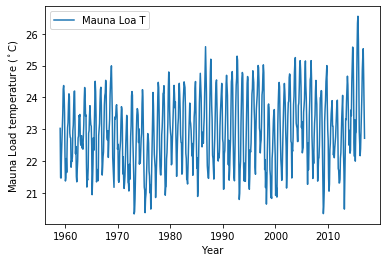

In [3]:
plt.plot(year, temp);
plt.ylabel('Mauna Load temperature ($^\circ$C)');
plt.xlabel('Year');
plt.legend(['Mauna Loa T']);

Here are the corresponding atmospheric CO2 levels from the Mauna Loa observatory

In [4]:
mco2 = [315.580000, 316.480000, 316.650000, 317.720000, 318.290000, 318.150000, 
        316.540000, 314.800000, 313.840000, 313.330000, 314.810000, 315.580000, 
        316.430000, 316.980000, 317.580000, 319.030000, 320.040000, 319.590000, 
        318.180000, 315.900000, 314.170000, 313.830000, 315.000000, 316.190000, 
        316.890000, 317.700000, 318.540000, 319.480000, 320.580000, 319.770000, 
        318.570000, 316.790000, 314.990000, 315.310000, 316.100000, 317.010000, 
        317.940000, 318.550000, 319.680000, 320.570000, 321.020000, 320.620000, 
        319.610000, 317.400000, 316.250000, 315.420000, 316.690000, 317.700000, 
        318.740000, 319.070000, 319.860000, 321.380000, 322.250000, 321.480000, 
        319.740000, 317.770000, 316.210000, 315.990000, 317.070000, 318.350000, 
        319.570000, 320.010000, 320.740000, 321.840000, 322.260000, 321.890000, 
        320.440000, 318.690000, 316.700000, 316.870000, 317.680000, 318.710000, 
        319.440000, 320.440000, 320.890000, 322.140000, 322.170000, 321.870000, 
        321.210000, 318.870000, 317.810000, 317.300000, 318.870000, 319.420000, 
        320.620000, 321.600000, 322.390000, 323.700000, 324.080000, 323.750000, 
        322.380000, 320.360000, 318.640000, 318.100000, 319.780000, 321.030000, 
        322.330000, 322.500000, 323.040000, 324.420000, 325.000000, 324.090000, 
        322.540000, 320.920000, 319.250000, 319.390000, 320.730000, 321.960000, 
        322.570000, 323.150000, 323.890000, 325.020000, 325.570000, 325.360000, 
        324.140000, 322.110000, 320.330000, 320.250000, 321.320000, 322.890000, 
        324.000000, 324.420000, 325.630000, 326.660000, 327.380000, 326.710000, 
        325.880000, 323.660000, 322.380000, 321.780000, 322.860000, 324.120000, 
        325.060000, 325.980000, 326.930000, 328.130000, 328.080000, 327.670000, 
        326.340000, 324.690000, 323.100000, 323.060000, 324.010000, 325.130000, 
        326.170000, 326.680000, 327.170000, 327.790000, 328.930000, 328.570000, 
        327.360000, 325.430000, 323.360000, 323.560000, 324.800000, 326.010000, 
        326.770000, 327.630000, 327.750000, 329.720000, 330.070000, 329.090000, 
        328.040000, 326.320000, 324.840000, 325.200000, 326.500000, 327.550000, 
        328.550000, 329.560000, 330.300000, 331.500000, 332.480000, 332.070000, 
        330.870000, 329.310000, 327.510000, 327.180000, 328.160000, 328.640000, 
        329.350000, 330.710000, 331.480000, 332.650000, 333.190000, 332.200000, 
        331.070000, 329.150000, 327.330000, 327.280000, 328.310000, 329.580000, 
        330.730000, 331.460000, 331.940000, 333.110000, 333.950000, 333.420000, 
        331.970000, 329.950000, 328.500000, 328.360000, 329.380000, 330.620000, 
        331.560000, 332.740000, 333.360000, 334.740000, 334.720000, 333.980000, 
        333.080000, 330.680000, 328.960000, 328.720000, 330.160000, 331.620000, 
        332.680000, 333.170000, 334.960000, 336.140000, 336.930000, 336.170000, 
        334.880000, 332.560000, 331.290000, 331.280000, 332.460000, 333.600000, 
        334.940000, 335.260000, 336.660000, 337.690000, 338.020000, 338.010000, 
        336.500000, 334.420000, 332.360000, 332.450000, 333.760000, 334.910000, 
        336.140000, 336.690000, 338.270000, 338.820000, 339.240000, 339.260000, 
        337.540000, 335.720000, 333.980000, 334.240000, 335.320000, 336.810000, 
        337.900000, 338.340000, 340.070000, 340.930000, 341.450000, 341.360000, 
        339.450000, 337.670000, 336.250000, 336.140000, 337.300000, 338.290000, 
        339.290000, 340.550000, 341.630000, 342.600000, 343.040000, 342.540000, 
        340.820000, 338.480000, 336.950000, 337.050000, 338.580000, 339.910000, 
        340.930000, 341.760000, 342.780000, 343.960000, 344.770000, 343.880000, 
        342.420000, 340.240000, 338.380000, 338.410000, 339.440000, 340.780000, 
        341.570000, 342.790000, 343.370000, 345.400000, 346.140000, 345.760000, 
        344.320000, 342.510000, 340.460000, 340.530000, 341.790000, 343.200000, 
        344.210000, 344.920000, 345.680000, 347.140000, 347.780000, 347.160000, 
        345.790000, 343.740000, 341.590000, 341.860000, 343.310000, 345.000000, 
        345.480000, 346.410000, 347.910000, 348.660000, 349.280000, 348.650000, 
        346.910000, 345.260000, 343.470000, 343.350000, 344.730000, 346.120000, 
        346.780000, 347.480000, 348.250000, 349.860000, 350.520000, 349.980000, 
        348.250000, 346.170000, 345.480000, 344.820000, 346.220000, 347.480000, 
        348.730000, 348.920000, 349.810000, 351.400000, 352.150000, 351.580000, 
        350.210000, 348.200000, 346.660000, 346.720000, 348.080000, 349.280000, 
        350.510000, 351.700000, 352.500000, 353.670000, 354.350000, 353.880000, 
        352.800000, 350.490000, 348.970000, 349.370000, 350.420000, 351.620000, 
        353.070000, 353.430000, 354.080000, 355.720000, 355.950000, 355.440000, 
        354.050000, 351.840000, 350.090000, 350.330000, 351.550000, 352.910000, 
        353.860000, 355.100000, 355.750000, 356.380000, 357.380000, 356.390000, 
        354.890000, 353.060000, 351.380000, 351.690000, 353.140000, 354.410000, 
        354.930000, 355.820000, 357.330000, 358.770000, 359.230000, 358.230000, 
        356.300000, 353.970000, 352.340000, 352.430000, 353.890000, 355.210000, 
        356.340000, 357.210000, 357.970000, 359.220000, 359.710000, 359.430000, 
        357.150000, 354.990000, 353.010000, 353.410000, 354.420000, 355.680000, 
        357.100000, 357.420000, 358.590000, 359.390000, 360.300000, 359.640000, 
        357.460000, 355.760000, 354.140000, 354.230000, 355.530000, 357.030000, 
        358.360000, 359.040000, 360.110000, 361.360000, 361.780000, 360.940000, 
        359.510000, 357.590000, 355.860000, 356.210000, 357.650000, 359.100000, 
        360.040000, 361.000000, 361.980000, 363.440000, 363.830000, 363.330000, 
        361.780000, 359.330000, 358.320000, 358.140000, 359.610000, 360.820000, 
        362.200000, 363.360000, 364.280000, 364.690000, 365.250000, 365.060000, 
        363.690000, 361.550000, 359.690000, 359.720000, 361.040000, 362.390000, 
        363.240000, 364.210000, 364.650000, 366.480000, 366.770000, 365.730000, 
        364.460000, 362.400000, 360.440000, 360.980000, 362.650000, 364.510000, 
        365.390000, 366.100000, 367.360000, 368.790000, 369.560000, 369.130000, 
        367.980000, 366.100000, 364.160000, 364.540000, 365.670000, 367.300000, 
        368.350000, 369.280000, 369.840000, 371.150000, 371.120000, 370.460000, 
        369.610000, 367.060000, 364.950000, 365.520000, 366.880000, 368.260000, 
        369.450000, 369.710000, 370.750000, 371.980000, 371.750000, 371.870000, 
        370.020000, 368.270000, 367.150000, 367.180000, 368.530000, 369.830000, 
        370.760000, 371.690000, 372.630000, 373.550000, 374.030000, 373.400000, 
        371.680000, 369.780000, 368.340000, 368.610000, 369.940000, 371.420000, 
        372.700000, 373.370000, 374.300000, 375.190000, 375.930000, 375.690000, 
        374.160000, 372.030000, 370.930000, 370.730000, 372.430000, 373.980000, 
        375.070000, 375.820000, 376.640000, 377.920000, 378.780000, 378.460000, 
        376.880000, 374.570000, 373.340000, 373.310000, 374.840000, 376.170000, 
        377.170000, 378.050000, 379.060000, 380.540000, 380.800000, 379.870000, 
        377.650000, 376.170000, 374.430000, 374.630000, 376.330000, 377.680000, 
        378.630000, 379.910000, 380.950000, 382.480000, 382.640000, 382.400000, 
        380.930000, 378.930000, 376.890000, 377.190000, 378.540000, 380.310000, 
        381.580000, 382.400000, 382.860000, 384.800000, 385.220000, 384.240000, 
        382.650000, 380.600000, 379.040000, 379.330000, 380.350000, 382.020000, 
        383.100000, 384.120000, 384.810000, 386.730000, 386.780000, 386.330000, 
        384.730000, 382.240000, 381.200000, 381.370000, 382.700000, 384.190000, 
        385.780000, 386.060000, 386.280000, 387.340000, 388.780000, 387.990000, 
        386.600000, 384.320000, 383.410000, 383.210000, 384.410000, 385.790000, 
        387.170000, 387.700000, 389.040000, 389.760000, 390.360000, 389.700000, 
        388.250000, 386.290000, 384.950000, 384.640000, 386.230000, 387.630000, 
        388.910000, 390.410000, 391.370000, 392.670000, 393.210000, 392.380000, 
        390.410000, 388.540000, 387.030000, 387.430000, 388.870000, 389.990000, 
        391.500000, 392.050000, 392.800000, 393.440000, 394.410000, 393.950000, 
        392.720000, 390.330000, 389.280000, 389.190000, 390.480000, 392.060000, 
        393.310000, 394.040000, 394.590000, 396.380000, 396.930000, 395.910000, 
        394.560000, 392.590000, 391.320000, 391.270000, 393.200000, 394.570000, 
        395.780000, 397.030000, 397.660000, 398.640000, 400.020000, 398.810000, 
        397.510000, 395.390000, 393.720000, 393.900000, 395.360000, 397.030000, 
        398.040000, 398.270000, 399.910000, 401.510000, 401.960000, 401.430000, 
        399.380000, 397.320000, 395.640000, 396.290000, 397.550000, 399.150000, 
        400.180000, 400.550000, 401.740000, 403.340000, 404.150000, 402.970000, 
        401.460000, 399.110000, 397.820000, 398.490000, 400.270000, 402.060000, 
        402.730000, 404.250000, 405.060000, 407.600000, 407.900000, 406.990000, 
        404.590000, 402.450000, 401.230000, 401.790000, 403.720000, 404.640000,]
aco2 = [315.98, 316.91, 317.64, 318.45, 318.99, 319.62, 320.04, 321.37, 322.18, 323.05,
        324.62, 325.68, 326.32, 327.46, 329.68, 330.19, 331.12, 332.03, 333.84, 335.41,
        336.84, 338.76, 340.12, 341.48, 343.15, 344.85, 346.35, 347.61, 349.31, 351.69,
        353.20, 354.45, 355.70, 356.54, 357.21, 358.96, 360.97, 362.74, 363.88, 366.84,       
        368.54, 369.71, 371.32, 373.45, 375.98, 377.70, 379.98, 382.09, 384.03, 385.83,
        387.64, 390.10, 391.85, 394.06, 396.74, 398.87, 401.01, 404.41, 406.76]
aco2 = np.array(aco2)
mco2 = np.array(mco2)

Again, plot data as a sanity check...

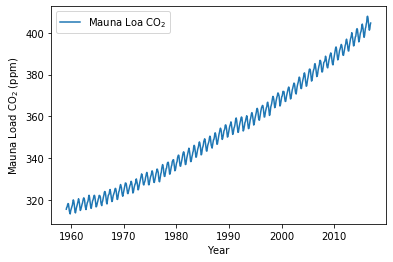

In [5]:
plt.plot(year, mco2);
plt.ylabel('Mauna Load CO$_2$ (ppm)');
plt.xlabel('Year');
plt.legend(['Mauna Loa CO$_2$']);

We also need annual time series

In [6]:
atemp = np.empty([2017-1959])
for y in range(1959, 2017):
    atemp[y-1959] = 0;
    for m in range(1,13):
        atemp[y-1959] = atemp[y-1959] + temp[(y-1959)*12+m-1]/12;
yr = np.array(range(1959, 2017));        

Sanity check...

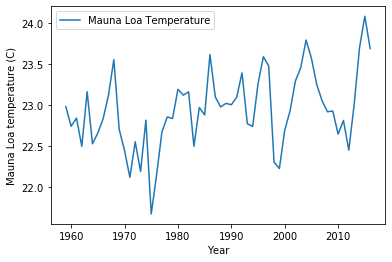

In [7]:
plt.plot(yr, atemp);
plt.ylabel('Mauna Loa temperature (C)');
plt.xlabel('Year');
plt.legend(['Mauna Loa Temperature']);

Next we have annual data from the Global Carbon Budget, for the years 1959-2017.  The fields are as follows: ffe - anthropogenic fossil fuel emissions; luc - land use change emissions; agr - atmospheric growth rate; gos - global ocean sink; gls - global land sink; ccs - cement cabonation sink; cbi - global budget imbalance.

In [8]:
ffe = np.array([2.42, 2.55, 2.55, 2.64, 2.79, 2.94, 3.08, 3.22, 3.32, 3.50,
       3.74, 4.05, 4.21, 4.41, 4.64, 4.62, 4.61, 4.86, 4.99, 5.17,
       5.31, 5.29, 5.14, 5.10, 5.15, 5.30, 5.49, 5.57, 5.75, 5.97,
       6.06, 6.20, 6.32, 6.13, 6.19, 6.24, 6.37, 6.56, 6.60, 6.58,
       6.67, 6.86, 6.91, 7.07, 7.42, 7.77, 8.03, 8.29, 8.54, 8.72,
       8.59, 9.04, 9.34, 9.49, 9.55, 9.62, 9.61, 9.61, 9.74])
luc = np.array([1.80, 1.66, 1.59, 1.56, 1.51, 1.47, 1.42, 1.39, 1.37, 1.37,
       1.37, 1.36, 1.34, 1.31, 1.30, 1.27, 1.25, 1.23, 1.22, 1.19,
       1.16, 1.20, 1.21, 1.21, 1.24, 1.28, 1.30, 1.32, 1.34, 1.37,
       1.39, 1.36, 1.35, 1.35, 1.35, 1.34, 1.34, 1.32, 1.79, 1.25,
       1.23, 1.38, 1.33, 1.50, 1.55, 1.51, 1.42, 1.50, 1.31, 1.36,
       1.60, 1.46, 1.38, 1.49, 1.53, 1.65, 1.70, 1.56, 1.52])
agr = np.array([2.04, 1.51, 1.66, 1.19, 1.21, 1.04, 2.34, 2.34, 1.30, 2.11,
       2.81, 2.41, 1.55, 3.13, 3.11, 1.45, 2.62, 2.07, 4.09, 2.75,
       4.56, 3.62, 2.41, 2.18, 3.90, 2.75, 3.45, 2.27, 5.76, 4.79,
       2.90, 2.64, 1.64, 1.52, 2.50, 3.57, 4.33, 2.25, 4.19, 6.04,
       2.87, 2.67, 3.90, 5.00, 4.81, 3.40, 5.23, 3.73, 4.46, 3.84,
       3.42, 5.16, 3.60, 5.07, 5.17, 4.22, 6.28, 6.07, 4.58])
gos = np.array([0.86, 0.84, 0.72, 0.77, 0.92, 1.11, 1.23, 1.19, 0.99, 1.07,
       1.11, 1.03, 1.10, 1.33, 1.30, 1.21, 1.18, 1.28, 1.39, 1.45,
       1.32, 1.63, 1.62, 1.71, 1.87, 1.73, 1.63, 1.70, 1.81, 1.71,
       1.67, 1.79, 1.90, 2.13, 2.07, 1.93, 1.92, 1.88, 1.99, 2.10,
       1.91, 1.87, 1.77, 2.16, 2.24, 2.14, 2.21, 2.26, 2.30, 2.22,
       2.28, 2.27, 2.39, 2.44, 2.48, 2.56, 2.61, 2.68, 2.52])
gls = np.array([0.68, 1.26, 0.66, 1.41, 1.02, 1.53, 0.48, 1.43, 1.64, 2.37, 
       0.75, 0.72, 2.29, 1.32, 1.80, 3.55, 2.41, 2.87, 1.58, 2.55,
       1.62, 0.78, 2.26, 1.79, 0.67, 2.84, 2.71, 2.35, 0.82, 2.20,
       3.51, 2.62, 2.21, 2.29, 3.10, 1.79, 2.02, 3.07, 3.26, 1.94,
       3.54, 3.76, 2.68, 1.61, 2.56, 3.60, 2.20, 3.22, 2.99, 3.63,
       3.03, 3.30, 4.08, 2.82, 3.64, 3.83, 2.64, 3.18, 3.83])
ccs = np.array([0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.06, 
       0.06, 0.06, 0.06, 0.06, 0.07, 0.07, 0.07, 0.08, 0.08, 0.08,
       0.08, 0.09, 0.09, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 0.14,
       0.15, 0.16, 0.17, 0.18, 0.19, 0.19, 0.20, 0.20, 0.20])
cbi = np.array([0.62,   0.58,  1.09,  0.81,  1.13,  0.70,  0.42, -0.38,  0.74, -0.70,
       0.42,   1.22,  0.58, -0.10, -0.30, -0.36, -0.37, -0.16, -0.89, -0.42,
       -1.07,  0.40,  0.02,  0.60, -0.09, -0.79, -1.05,  0.51, -1.35, -1.41,
       -0.69,  0.44,  1.86,  1.47, -0.19,  0.22, -0.65,  0.60, -1.13, -2.34,
       -0.50, -0.14, -0.19, -0.30, -0.74,  0.04, -0.31,  0.45, -0.04,  0.24,
        1.30, -0.39,  0.49,  0.46, -0.40,  0.46, -0.41, -0.97,  0.13])

Convert all to ppm from GtC and interpolate to facilitate monthly integration of the model later

In [9]:
gcb_year    = list(range(1959,2018));
ppm_to_gtc = 2.13
gtc_to_ppm = 1/ppm_to_gtc
ffe = gtc_to_ppm*np.interp(year, gcb_year, ffe);
luc = gtc_to_ppm*np.interp(year, gcb_year, luc);
agr = gtc_to_ppm*np.interp(year, gcb_year, agr);
gos = gtc_to_ppm*np.interp(year, gcb_year, gos);
gls = gtc_to_ppm*np.interp(year, gcb_year, gls);
ccs = gtc_to_ppm*np.interp(year, gcb_year, ccs);
cbi = gtc_to_ppm*np.interp(year, gcb_year, cbi);

Another sanity check plot...

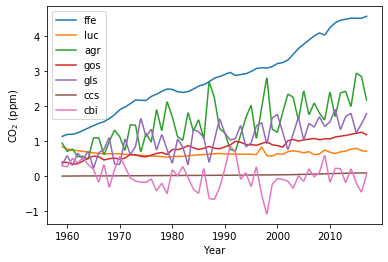

In [10]:
plt.plot(year, ffe, year, luc, year, agr, year, gos, year, gls, year, ccs, year, cbi);
plt.ylabel('CO$_2$ (ppm)');
plt.xlabel('Year');
plt.legend(['ffe', 'luc', 'agr', 'gos', 'gls', 'ccs', 'cbi']);

<a id='a_corollary_of_mass_balance'></a>

## A Corollary of Mass Balance

Compare natural and anthropogenic components of the gloabl carbon budget:

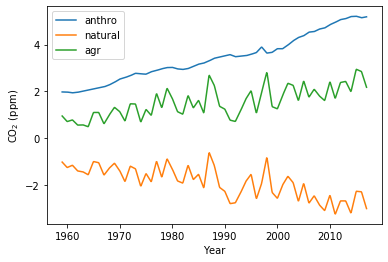

In [11]:
plt.plot(year, ffe+luc-ccs, year, -gos -gls - cbi, year, agr);
plt.ylabel('CO$_2$ (ppm)');
plt.xlabel('Year');
plt.legend(['anthro', 'natural', 'agr']);

This is an important diagram to bear in mind when evaluating claims that the rise in atmospheric CO2 is temperature driven, rather than due to anthropogenic emissions.  The annual growth rate is the sum of anthropogenic influences (fossil fuel emissions and land use change, both of which are known with reasonably high certainty) and natural influences (oceanic emissions and uptake and land emissions and uptake).  The magnitudes of natural fluxes are known with rather less certainty.  However, as conservation of mass applies, we can estimate the total natural contribution by just subtracting anthro from the annual growth rate (agr).  The result shows (i) the total natural contribution is *negative*, i.e. it is opposing the rise in atmospheric CO2; and (ii) it is becoming more and more negative with time.  It seems hard to argue that the rise is being caused by a temperature driven change in natural emissions while the net effect of all natural sources and sinks is to oppose the rise with increasing strength!  This has, of course, been pointed out to both Prof. Harde and Prof. Salby.

This answers the question "What Really Controls the Atmospheric CO$_2$ Level?" - it clearly isn't the natural carbon cycle as it is trying to push atmospheric CO$_2$ levels in the opposite direction and is not succeeding!

<a id='ajustment_and_residence_time_not_the_same'></a>

In [12]:
<a id="trying_to_reproduce_figure_5"></a>

SyntaxError: invalid syntax (<ipython-input-12-f6858eb7f85e>, line 1)

## Trying to Reproduce Figure 5

To begin with, we will elave out the seasonal variation (as it isn't important regarding future atmospheric levels).

In [ ]:
tau_R  = 4
e_N0   = 50 
beta_e = 29.2;
C      = mco2[0]
CO2    = np.array(mco2);
atemp  = np.interp(year, yr, atemp)
for i in range(1, mco2.size):
    dT = atemp[i] - 21.689;
    dC = e_N0 + beta_e*np.power(dT, 1.3) + ffe[i-1] + luc[i-1] - (CO2[i-1]/tau_R)
    CO2[i] = CO2[i-1] + dC/12
plt.plot(year, mco2, year, CO2);
plt.ylabel('CO$_2$ (ppm)');
plt.xlabel('Year');
plt.legend(['Mauna Loa', 'HS21']);
min(atemp)

This is as close as I have managed so far.  However the seasonal component has an average value of 27.4ppm/yr, which has been left out, which should result in modelled CO2 levels plumetting, so I am not sure what is going on there.  I was going to add it to e_N0 (which is where it probably belongs).  Also the modelled output in the paper is comparatively smooth (ignoring the seasonal component), unlike the integration shown above.  I find that strange as the variation in Hawaii anual average temperature is about 2C, which would be a difference of over 60 ppm/year, so it is hard to see how the modelled output could be smooth...

This is what the temperature dependent flux looks like:

In [ ]:
plt.plot(year, beta_e*np.power(atemp - 21.689, 1.3));
plt.ylabel('CO$_2$ (ppm/yr)');
plt.xlabel('Year');
plt.legend(['temp']);

Note that it also has a large mean (steady-state) value, which perhaps explains why the model "works", even though $e_{N0}$ is much smaller than expected.  The annual growth rate is only of the order of 2ppm/yr, so a fluctuation like this is bound to show up in atmospheric CO2 levels as there is no fluctuation in the model that could possibly cancel it out.

I think this suggests that the contents of figure 5 are not what they are purported to be.